In [4]:
import game
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%load_ext autoreload
%autoreload 2

game = game.Game()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# Plot value function
def plot_value_function(q):
    # takes action_val but plots value function, ie max of values
    %pylab inline
    V = np.amax(q, axis=2)
    fig = plt.figure()
    x = range(1, 11)
    y = range(1, 22)
    X, Y = np.meshgrid(x, y, indexing='ij')

    print np.shape(X), np.shape(Y), np.shape(V[1:22,1:11].T)
    with plt.rc_context({"axes.grid": True, "figure.figsize": (15,10)}):
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, V[1:22,1:11].T, rstride=1, cstride=1) 
        ax.set_xlabel("Dealer Hand")
        ax.set_ylabel("Player Hand")
        ax.set_zlabel("Expected reward")
        plt.show()


## Monte Carlo Control

Populating the interactive namespace from numpy and matplotlib
(10, 21) (10, 21) (10, 21)


/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


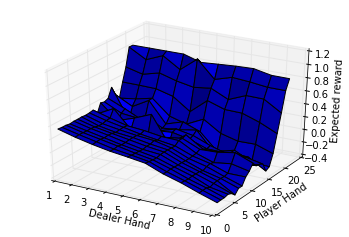

In [6]:
mc_q = game.monte_carlo_control(nepisodes=1000000, n0=100)
plot_value_function(mc_q)


In [7]:
# evaluate by simulation, what is the expected reward using this policy
mc_pi = np.argmax(mc_q, axis=2)
game.evaluate_policy_naive(mc_pi, nepisodes=100000)

0.05145

In [8]:
print 'number of states where a player should hit - :',  np.sum(mc_pi)
print 'states, where the player should hit - first elem in a tuple is players sum:'
print zip(*np.where(mc_pi==1))

number of states where a player should hit - : 23
states, where the player should hit - first elem in a tuple is players sum:
[(6, 10), (9, 8), (9, 10), (10, 6), (10, 9), (10, 10), (11, 3), (11, 4), (11, 8), (11, 9), (11, 10), (12, 8), (12, 9), (12, 10), (13, 8), (13, 10), (14, 7), (14, 9), (14, 10), (15, 2), (15, 7), (16, 9), (16, 10)]


output for 3m teration 25 states to hit, [(10, 5), (10, 7), (10, 8), (10, 9), (10, 10), (11, 4), (11, 5), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (12, 1), (12, 3), (12, 5), (12, 7), (12, 9), (12, 10), (13, 7), (13, 8), (13, 9), (13, 10), (14, 9), (14, 10), (16, 10)]

In [9]:
(mc_q ** 2).mean()

0.054379656471351762

## TD Learning

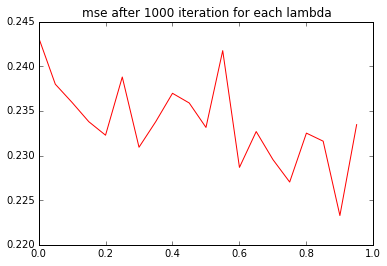

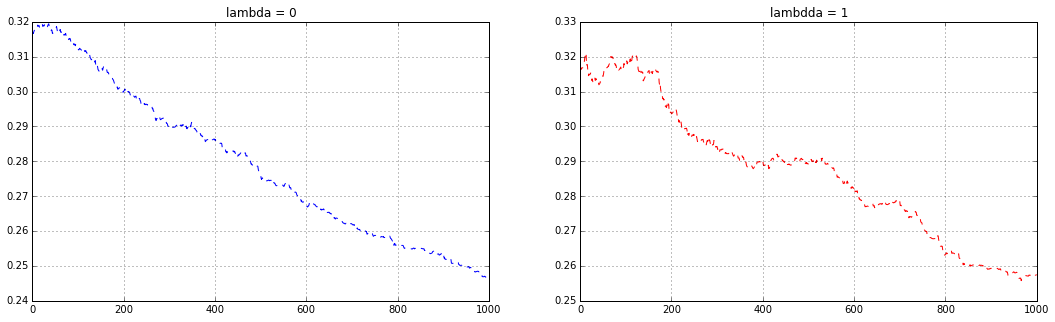

In [42]:
mses_for_lmbd = []
lmbds = np.arange(0, 1, 0.05)
for lmbd in lmbds:
    _, mses = game.sarsa_lambda_control(nepisodes=1000, n0=100, lmbd=lmbd, q_star=mc_q, mse_prog=False)
    mses_for_lmbd.append(mses[-1])
plt.title("mse after 1000 iteration for each lambda")
plot(lmbds, mses_for_lmbd, 'r-')
plt.show()

with plt.rc_context({"axes.grid": True, "figure.figsize": (18,5)}):
    _, mses_for_zero = game.sarsa_lambda_control(nepisodes=1000, n0=100, lmbd=0, q_star=mc_q, mse_prog=True)
    _, mses_for_one = game.sarsa_lambda_control(nepisodes=1000, n0=100, lmbd=1, q_star=mc_q, mse_prog=True)
    plt.subplot(1, 2, 1)
    plt.plot(mses_for_zero, 'b--')
    #pylab.ylim([0,1.1])
    plt.title("lambda = 0")
    plt.subplot(1, 2, 2)
    plt.plot(mses_for_one, 'r--')
    plt.title("lambdda = 1")
    #pylab.ylim([0,1.1])
    plt.show()
    

Populating the interactive namespace from numpy and matplotlib
(10, 21) (10, 21) (10, 21)


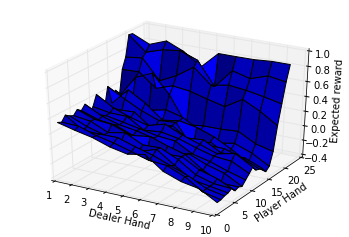

[(6, 5), (7, 9), (8, 6), (8, 10), (9, 1), (9, 7), (9, 8), (9, 10), (10, 2), (10, 7), (10, 8), (10, 9), (10, 10), (11, 2), (11, 4), (11, 6), (11, 7), (11, 8), (11, 9), (11, 10), (12, 1), (12, 2), (12, 4), (12, 5), (12, 6), (12, 9), (12, 10), (13, 1), (13, 2), (13, 4), (13, 6), (13, 7), (13, 9), (13, 10), (14, 6), (14, 8), (14, 10), (15, 9), (15, 10)]


In [45]:
sarsa_q = game.sarsa_lambda_control(nepisodes=100000, n0=100, lmbd=0.5)
#print sarsa_q
plot_value_function(sarsa_q)
sarsa_pi = np.argmax(sarsa_q, axis=2)
#print sarsa_q
print zip(*np.where(sarsa_pi==1))

## Linear Function Approximation

In [46]:
# evaluate by simulation if our FA gives us correct answer, fa_q in this case is build up using only feature
# weights, we use 1M steps
fa_q = game.sarsa_lambda_control_lfa(nepisodes=100000, st_size=0.01, exp_rate=0.1, lmbd=0.3)
#fa_q = game.monte_carlo_control(nepisodes=10000, n0=100)

In [51]:
fa_pi = np.argmax(fa_q, axis=2)
game.evaluate_policy_naive(fa_pi, nepisodes=100000)
#print fa_q

0.04354

In [48]:
#print 'number of states where a player should hit - :',  np.sum(fa_pi)
#print 'states, where the player should hit - first elem in a tuple is players sum:'
zip(*np.where(fa_pi==1))
#fa_q

[]

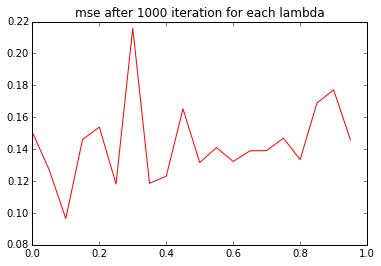

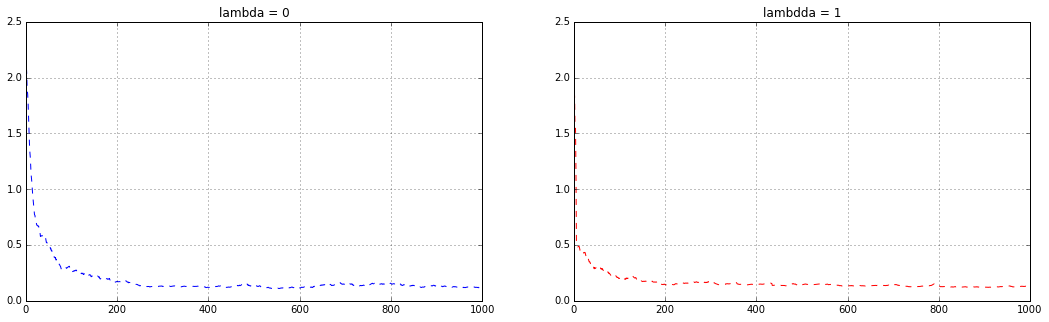

In [49]:

mses_for_lmbd = []
lmbds = np.arange(0, 1, 0.05)
for lmbd in lmbds:
    _, mses = game.sarsa_lambda_control_lfa(nepisodes=1000, st_size=0.01, exp_rate=0.05, lmbd=lmbd, q_star=mc_q, mse_prog=False)
    mses_for_lmbd.append(mses[-1])
plt.title("mse after 1000 iteration for each lambda")
plot(lmbds, mses_for_lmbd, 'r-')
plt.show()
#plt.figure()

with plt.rc_context({"axes.grid": True, "figure.figsize": (18,5)}):
    _, mses_for_zero = game.sarsa_lambda_control_lfa(nepisodes=1000, st_size=0.01, exp_rate=0.05, lmbd=0, q_star=mc_q, mse_prog=True)
    _, mses_for_one = game.sarsa_lambda_control_lfa(nepisodes=1000, st_size=0.01, exp_rate=0.05, lmbd=1, q_star=mc_q, mse_prog=True)
    plt.subplot(1, 2, 1)
    plt.plot(mses_for_zero, 'b--')
    #pylab.ylim([0,1.1])
    plt.title("lambda = 0")
    plt.subplot(1, 2, 2)
    plt.plot(mses_for_one, 'r--')
    plt.title("lambdda = 1")
    #pylab.ylim([0,1.1])
    plt.show()